In [ ]:
import numpy as np

def expected_tests_required(pool_size, prevalence_rate, sensitivity, specificity, n_samples_per_person):
    """
    Calculates the expected number of tests required for a given pool size using a binomial distribution model.

    Args:
        pool_size (int): Number of people per pool.
        prevalence_rate (float): Prevalence rate (probability of a person being positive).
        sensitivity (float): Sensitivity of the test (probability of a positive test result given a positive sample).
        specificity (float): Specificity of the test (probability of a negative test result given a negative sample).
        n_samples_per_person (int): Number of samples taken per person.

    Returns:
        float: Expected number of tests required.
    """
    p_neg = (1 - prevalence_rate) ** n_samples_per_person
    p_pos = 1 - p_neg
    p_false_neg = (1 - sensitivity) ** n_samples_per_person
    p_false_pos = 1 - (1 - specificity) ** n_samples_per_person
    p_pos_given_pos_result = 1 - p_false_neg
    p_neg_given_neg_result = 1 - p_false_pos

    expected_tests = p_pos * (1 + (pool_size - 1) * p_pos_given_pos_result) + p_neg_given_neg_result

    return expected_tests

def optimize_pool_size(prevalence_rate, sensitivity, specificity, n_samples_per_person):
    """
    Optimizes the group testing strategy by finding the optimal pool size.

    Args:
        prevalence_rate (float): Prevalence rate (probability of a person being positive).
        sensitivity (float): Sensitivity of the test (probability of a positive test result given a positive sample).
        specificity (float): Specificity of the test (probability of a negative test result given a negative sample).
        n_samples_per_person (int): Number of samples taken per person.

    Returns:
        int: Optimal pool size.
    """
    optimal_pool_size = None
    min_expected_tests = float('inf')

    for pool_size in range(2, 11):  # Loop through pool sizes from 2 to 10
        expected_tests = expected_tests_required(pool_size, prevalence_rate, sensitivity, specificity, n_samples_per_person)
        if expected_tests < min_expected_tests:
            min_expected_tests = expected_tests
            optimal_pool_size = pool_size

    return optimal_pool_size

# Example usage
prevalence_rate = 0.1
sensitivity = 0.9
specificity = 0.95
n_samples_per_person = 3

optimal_pool_size = optimize_pool_size(prevalence_rate, sensitivity, specificity, n_samples_per_person)
print("Optimal Pool Size: ", optimal_pool_size)


In [ ]:
import math

def optimize_pooling_strategy(n, alpha, k_max, n_max):
    """
    Optimize pooling strategy using normal distribution model.
    
    Args:
        n (int): Number of individuals to be tested
        alpha (float): Expected prevalence rate (between 0 and 1)
        k_max (int): Maximum pool size
        n_max (int): Maximum number of samples per individual
        
    Returns:
        optimal_k (int): Optimal pool size
        expected_tests (float): Expected number of tests required
    """
    optimal_k = 1
    expected_tests = float('inf')
    
    for k in range(1, k_max + 1):
        for n in range(1, n_max + 1):
            p = alpha * n
            q = 1 - p
            variance = n * p * q
            standard_deviation = math.sqrt(variance)
            expected_tests_for_k_n = n + k * math.ceil(math.log2(n))
            
            if expected_tests_for_k_n < expected_tests:
                expected_tests = expected_tests_for_k_n
                optimal_k = k
    
    return optimal_k, expected_tests

# Example usage
n = 8000000 # Number of individuals to be tested
alpha = 0.1 # Expected prevalence rate
k_max = 10 # Maximum pool size
n_max = 3 # Maximum number of samples per individual

optimal_k, expected_tests = optimize_pooling_strategy(n, alpha, k_max, n_max)
print("Optimal pool size: ", optimal_k)
print("Expected number of tests: ", expected_tests)


In [ ]:
import math

def optimize_pooling_strategy(n, alpha, k_max, n_max, total_population):
    """
    Optimize pooling strategy using normal distribution model.
    
    Args:
        n (int): Number of individuals to be tested
        alpha (float): Expected prevalence rate (between 0 and 1)
        k_max (int): Maximum pool size
        n_max (int): Maximum number of samples per individual
        total_population (int): Total population to be tested
        
    Returns:
        optimal_k (int): Optimal pool size
        expected_tests (float): Expected number of tests required
    """
    optimal_k = 1
    expected_tests = float('inf')
    
    for k in range(1, k_max + 1):
        for n in range(1, n_max + 1):
            p = alpha * n
            q = 1 - p
            variance = n * p * q
            standard_deviation = math.sqrt(variance)
            expected_tests_for_k_n = n + k * math.ceil(math.log2(n)) + math.ceil(total_population / (k * n))
            
            if expected_tests_for_k_n < expected_tests:
                expected_tests = expected_tests_for_k_n
                optimal_k = k
    
    return optimal_k, expected_tests

# Example usage
n = 8000000 # Number of individuals to be tested
alpha = 0.1 # Expected prevalence rate
k_max = 10 # Maximum pool size
n_max = 3 # Maximum number of samples per individual
total_population = 8000000 # Total population to be tested

optimal_k, expected_tests = optimize_pooling_strategy(n, alpha, k_max, n_max, total_population)
print("Optimal pool size: ", optimal_k)
print("Expected number of tests: ", expected_tests)


In [ ]:
import math

def optimize_pooling_strategy(alpha_list, n_list, k_max, n_max, total_population):
    """
    Optimize pooling strategy using normal distribution model for different values of alpha and n.
    
    Args:
        alpha_list (list): List of expected prevalence rates (between 0 and 1)
        n_list (list): List of number of samples per individual
        k_max (int): Maximum pool size
        n_max (int): Maximum number of samples per individual
        total_population (int): Total population to be tested
        
    Returns:
        optimal_k_dict (dict): Dictionary with optimal pool size for each combination of alpha and n
        expected_tests_dict (dict): Dictionary with expected number of tests for each combination of alpha and n
    """
    optimal_k_dict = {}
    expected_tests_dict = {}
    
    for alpha in alpha_list:
        for n in n_list:
            optimal_k = 1
            expected_tests = float('inf')

            for k in range(1, k_max + 1):
                p = alpha * n
                q = 1 - p
                variance = n * p * q
                standard_deviation = math.sqrt(variance)
                expected_tests_for_k_n = n + k * math.ceil(math.log2(n)) + math.ceil(total_population / (k * n))

                if expected_tests_for_k_n < expected_tests:
                    expected_tests = expected_tests_for_k_n
                    optimal_k = k

            key = f"alpha={alpha}, n={n}"
            optimal_k_dict[key] = optimal_k
            expected_tests_dict[key] = expected_tests
    
    return optimal_k_dict, expected_tests_dict

# Example usage
alpha_list = [0.02, 0.06, 0.1] # List of expected prevalence rates
n_list = [1, 2, 3] # List of number of samples per individual
k_max = 10 # Maximum pool size
n_max = 3 # Maximum number of samples per individual
total_population = 8000000 # Total population to be tested

optimal_k_dict, expected_tests_dict = optimize_pooling_strategy(alpha_list, n_list, k_max, n_max, total_population)

# Print optimal pool size and expected number of tests for each combination of alpha and n
for key in optimal_k_dict.keys():
    print(f"Optimal pool size for {key}: {optimal_k_dict[key]}")
    print(f"Expected number of tests for {key}: {expected_tests_dict[key]}")


In [1]:
import sympy as sp

# 定义符号变量
q, k, x = sp.symbols('q k x')

# 计算 E(x)
e_x = q*k*(1/k) + (1+1/k)*(1-q*k)

# 计算 f(x)
f_x = 1-q*x + 1/x

# 计算 P(x)
p_x = 1 - f_x

# 计算 P'(x)
p_prime_x = sp.diff(p_x, x)

# 求解 P'(x) = 0 的解
solutions = sp.solve(p_prime_x, x)

# 打印解
print("P'(x) = 0 的解为：", solutions)

# 求解 P(x) 在 x = e 时的值
p_e = p_x.subs(x, sp.E)
print("P(x) 在 x = e 时的值为：", p_e)



P'(x) = 0 的解为： [-sqrt(-1/q), sqrt(-1/q)]
P(x) 在 x = e 时的值为： E*q - exp(-1)


In [5]:
import numpy as np

# 定义阳性率列表
positivity_rates = np.linspace(0.01, 0.11, num=11)

# 初始化最优的每组人数和对应的最大p值
best_group_sizes = [10,8,6,6,5,4,4,4,4,4]
max_p_values = []

# 遍历阳性率列表
for positivity_rate in positivity_rates:
    # 计算E(x)的表达式
    e_x = 0
    if best_group_sizes:
        if best_group_sizes[-1] != 0:
            e_x = 1 - positivity_rate + 1 / best_group_sizes[-1]

    # 遍历可能的每组人数
    max_p = -1
    best_group_size = 0
    for group_size in range(1, 11):
        # 计算E(x1)的表达式
        e_x1 = positivity_rate * (1 / group_size)
        if best_group_sizes:
            if best_group_sizes[-1] != 0:
                e_x1 += (1 - positivity_rate) * (1 + 1 / group_size + 1 / best_group_sizes[-1])

        # 比较E(x1)和E(x)，更新最大p值和最优的每组人数
        if e_x1 < e_x:
            if e_x1 > max_p:
                max_p = e_x1
                best_group_size = group_size

    # 将最优的每组人数和对应的最大p值加入结果列表
    best_group_sizes.append(best_group_size)
    max_p_values.append(max_p)

# 打印结果
print("阳性率\t最优的每组人数\t最大p值")
for i in range(len(positivity_rates)):
    print("{:.3f}\t\t{}\t\t{:.4f}".format(positivity_rates[i], best_group_sizes[i], max_p_values[i]))


阳性率	最优的每组人数	最大p值
0.010		10		-1.0000
0.020		8		-1.0000
0.030		6		-1.0000
0.040		6		-1.0000
0.050		5		-1.0000
0.060		4		-1.0000
0.070		4		-1.0000
0.080		4		-1.0000
0.090		4		-1.0000
0.100		4		-1.0000
0.110		0		-1.0000


In [6]:
import math

def calculate_ex(q, k):
    """
    计算期望值 E(x)
    Args:
        q: 阳性率
        k: 分组大小

    Returns:
        ex: 期望值 E(x)
    """
    ex = q ** k * (1/k) + (1 + 1/k) * (1 - q ** k)
    return ex

def check_condition(q, k):
    """
    判断是否满足 p < 1 - 1/sqrt[k]{k} 的条件
    Args:
        q: 阳性率
        k: 分组大小

    Returns:
        True: 满足条件
        False: 不满足条件
    """
    p = 1 - 1 / math.sqrt(k)
    return calculate_ex(q, k) < 1 - p

# 示例输入
q = 0.1  # 阳性率
k = 3  # 分组大小

# 计算期望值 E(x)
ex = calculate_ex(q, k)
print("期望值 E(x) = ", ex)

# 判断是否满足条件
result = check_condition(q, k)
if result:
    print("满足条件 p < 1 - 1/sqrt[k]{k}")
else:
    print("不满足条件 p < 1 - 1/sqrt[k]{k}")


期望值 E(x) =  1.3323333333333331
不满足条件 p < 1 - 1/sqrt[k]{k}


In [16]:
import math

def calculate_p(x):
    """
    计算 P(x)
    Args:
        x: 分组大小

    Returns:
        px: P(x) 的值
    """
    px = 1 - 1 / math.pow(x, 1/x)
    return px

def calculate_derivative(x):
    """
    计算 P(x) 的导数
    Args:
        x: 分组大小

    Returns:
        derivative: P(x) 的导数值
    """
    derivative = 1 / x**(1/x) * 1 / x**2 * (1 - np.log(x))
    return derivative

# 示例输入
x = 3  # 分组大小

# 计算 P(x)
px = calculate_p(x)
print("P(x) = ", px)

# 计算 P(x) 的导数
derivative = calculate_derivative(x)
print("P'(x) = ", derivative)


P(x) =  0.30663872564936523
P'(x) =  -0.007597104681950362


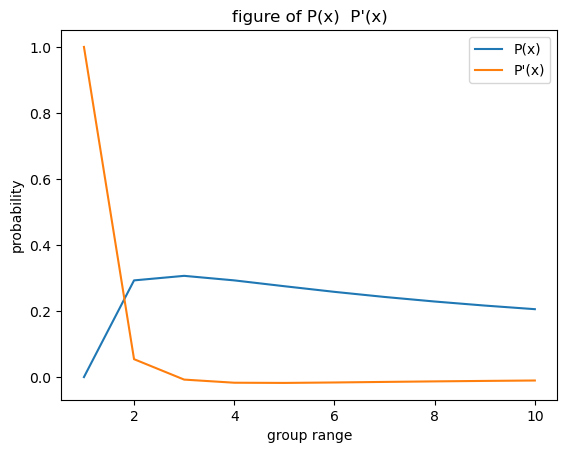

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_p(x):
    """
    计算 P(x)
    Args:
        x: 分组大小

    Returns:
        px: P(x) 的值
    """
    px = 1 - 1 / np.power(x, 1/x)
    return px

def calculate_derivative(x):
    """
    计算 P(x) 的导数
    Args:
        x: 分组大小

    Returns:
        derivative: P(x) 的导数值
    """
    derivative = 1 / x**(1/x) * 1 / x**2 * (1 - np.log(x))
    return derivative

# 设置分组大小的范围
x_range = np.arange(1, 11, 1)

# 计算 P(x) 和 P'(x) 的值
px_values = calculate_p(x_range)
derivative_values = calculate_derivative(x_range)

# 绘制 P(x) 和 P'(x) 的曲线
plt.plot(x_range, px_values, label='P(x)')
plt.plot(x_range, derivative_values, label="P'(x)")
plt.xlabel('group range')
plt.ylabel('probability')
plt.legend()
plt.title('figure of P(x)  P\'(x)')
plt.show()


In [10]:
def calculate_ex(alpha, k):
    q = 1 - alpha
    ex = 1 - np.power(q, k) + 1/k
    return ex

alpha_values = [0.010, 0.020, 0.030, 0.040, 0.050, 0.060, 0.070, 0.080, 0.090, 0.100, 0.110]
k_values = [10, 8, 6, 6, 5, 5, 4, 4, 4, 4, 4]

print("阳性率\t第一次分组每组人数\tE(x)")
for i in range(len(alpha_values)):
    alpha = alpha_values[i]
    k = k_values[i]
    ex = calculate_ex(alpha, k)
    print("{:.3f}\t{}\t\t{:.4f}".format(alpha, k, ex))


阳性率	第一次分组每组人数	E(x)
0.010	10		0.1956
0.020	8		0.2742
0.030	6		0.3337
0.040	6		0.3839
0.050	5		0.4262
0.060	5		0.4661
0.070	4		0.5019
0.080	4		0.5336
0.090	4		0.5643
0.100	4		0.5939
0.110	4		0.6226


In [21]:
import numpy as np

def calculate_ex(alpha, k, k1):
    """
    计算 E(x1) 的值
    Args:
        alpha: 阳性率
        k: 第一次分组每组人数
        k1: 第二次分组每组人数

    Returns:
        ex: E(x1) 的值
    """
    q = 1 - alpha
    ex = np.power(q, k) * (1/k) + (1 - np.power(q, k)) * (1 + 1/k + 1/k1 - np.power(q, k1))
    return ex

alpha_values = [0.010, 0.020, 0.030, 0.040, 0.050, 0.060, 0.070, 0.080, 0.090, 0.100, 0.110]
k_values = [10, 8, 6, 6, 5, 5, 4, 4, 4, 4, 4]
k1 = 9  # 第二次分组每组人数

print("阳性率\t分组每组人数\tE(x1)")
for i in range(len(alpha_values)):
    alpha = alpha_values[i]
    k = k_values[i]
    ex = calculate_ex(alpha, k, k1)
    print("{:.3f}\t{}\t\t{:.4f}".format(alpha, k, ex))


阳性率	分组每组人数	E(x1)
0.010	10		0.1189
0.020	8		0.1664
0.030	6		0.2253
0.040	6		0.2576
0.050	5		0.3088
0.060	5		0.3432
0.070	4		0.3988
0.080	4		0.4312
0.090	4		0.4647
0.100	4		0.4989
0.110	4		0.5334


In [18]:
import math

def calculate_first_group_size(q, k, k1):
    # 计算新公式中的每组人数
    p = q**k * (1/k) + (1-q**k) * (1 + 1/k + 1/k1) * (1 - q**k1)
    return p

# 定义阳性率和第一次分组每组人数的数据
q_values = [0.010, 0.020, 0.030, 0.040, 0.050, 0.060, 0.070, 0.080, 0.090, 0.100, 0.110]
k_values = [10,8,6,6,5,4,4,4,4,4]
k1_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# 遍历所有组合，计算最优的第一次分组每组人数
for q in q_values:
    for k in k_values:
        for k1 in k1_values:
            first_group_size = calculate_first_group_size(q, k, k1)
            print("q = {:.3f}, k = {}, k1 = {}, First Group S {:.3f}".format(q, k, k1, first_group_size))


q = 0.010, k = 10, k1 = 1, First Group Size = 2.079
q = 0.010, k = 10, k1 = 2, First Group Size = 1.600
q = 0.010, k = 10, k1 = 3, First Group Size = 1.433
q = 0.010, k = 10, k1 = 4, First Group Size = 1.350
q = 0.010, k = 10, k1 = 5, First Group Size = 1.300
q = 0.010, k = 10, k1 = 6, First Group Size = 1.267
q = 0.010, k = 10, k1 = 7, First Group Size = 1.243
q = 0.010, k = 10, k1 = 8, First Group Size = 1.225
q = 0.010, k = 10, k1 = 9, First Group Size = 1.211
q = 0.010, k = 10, k1 = 10, First Group Size = 1.200
q = 0.010, k = 8, k1 = 1, First Group Size = 2.104
q = 0.010, k = 8, k1 = 2, First Group Size = 1.625
q = 0.010, k = 8, k1 = 3, First Group Size = 1.458
q = 0.010, k = 8, k1 = 4, First Group Size = 1.375
q = 0.010, k = 8, k1 = 5, First Group Size = 1.325
q = 0.010, k = 8, k1 = 6, First Group Size = 1.292
q = 0.010, k = 8, k1 = 7, First Group Size = 1.268
q = 0.010, k = 8, k1 = 8, First Group Size = 1.250
q = 0.010, k = 8, k1 = 9, First Group Size = 1.236
q = 0.010, k = 8, k1

In [19]:
import math

def calculate_first_group_size(q, k, k1):
    # 计算公式中的每组人数
    p = q**k * (1/k) + (1-q**k) * (1 + 1/k + 1/k1 - q**k1)
    return p

# 定义阳性率、第一次分组每组人数和第二次分组每组人数的数据
q_values = [0.010, 0.020, 0.030, 0.040, 0.050, 0.060, 0.070, 0.080, 0.090, 0.100, 0.110]
k_values = [10]
k1_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# 遍历所有组合，计算最优的第一次分组每组人数
for q in q_values:
    for k in k_values:
        for k1 in k1_values:
            first_group_size = calculate_first_group_size(q, k, k1)
            print("q = {:.3f}, k = {}, k1 = {}, First Group Size = {:.3f}".format(q, k, k1, first_group_size))


q = 0.010, k = 10, k1 = 1, First Group Size = 2.090
q = 0.010, k = 10, k1 = 2, First Group Size = 1.600
q = 0.010, k = 10, k1 = 3, First Group Size = 1.433
q = 0.010, k = 10, k1 = 4, First Group Size = 1.350
q = 0.010, k = 10, k1 = 5, First Group Size = 1.300
q = 0.010, k = 10, k1 = 6, First Group Size = 1.267
q = 0.010, k = 10, k1 = 7, First Group Size = 1.243
q = 0.010, k = 10, k1 = 8, First Group Size = 1.225
q = 0.010, k = 10, k1 = 9, First Group Size = 1.211
q = 0.010, k = 10, k1 = 20, First Group Size = 1.150
q = 0.020, k = 10, k1 = 1, First Group Size = 2.080
q = 0.020, k = 10, k1 = 2, First Group Size = 1.600
q = 0.020, k = 10, k1 = 3, First Group Size = 1.433
q = 0.020, k = 10, k1 = 4, First Group Size = 1.350
q = 0.020, k = 10, k1 = 5, First Group Size = 1.300
q = 0.020, k = 10, k1 = 6, First Group Size = 1.267
q = 0.020, k = 10, k1 = 7, First Group Size = 1.243
q = 0.020, k = 10, k1 = 8, First Group Size = 1.225
q = 0.020, k = 10, k1 = 9, First Group Size = 1.211
q = 0.020, 

In [22]:
import math

def calculate_first_group_size(q, k, k1):
    # 计算公式中的第一次分组每组人数
    p = q**k * (1/k) + (1-q**k) * (1 + 1/k + 1/k1 - q**k1)
    return p

def calculate_second_group_size(q, k, k1):
    # 计算公式中的第二次分组每组人数
    p_prime = (1/k1) * q**k1 + (1-q**k1) * (1 + 1/k + 1/k1 - q**k)
    return p_prime

# 定义阳性率、第一次分组每组人数和第二次分组每组人数的数据
q_values = [0.010, 0.020, 0.030, 0.040, 0.050, 0.060, 0.070, 0.080, 0.090, 0.100, 0.110]
k_values = [10]
k1_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# 遍历所有组合，计算最优的第一次分组每组人数和第二次分组每组人数
for q in q_values:
    for k in k_values:
        for k1 in k1_values:
            first_group_size = calculate_first_group_size(q, k, k1)
            second_group_size = calculate_second_group_size(q, k, k1)
            print("q = {:.3f}, k = {}, k1 = {}, First Group Size = {:.3f}, Second Group Size = {:.3f}".format(q, k, k1, first_group_size, second_group_size))


q = 0.010, k = 10, k1 = 1, First Group Size = 2.090, Second Group Size = 2.089
q = 0.010, k = 10, k1 = 2, First Group Size = 1.600, Second Group Size = 1.600
q = 0.010, k = 10, k1 = 3, First Group Size = 1.433, Second Group Size = 1.433
q = 0.010, k = 10, k1 = 4, First Group Size = 1.350, Second Group Size = 1.350
q = 0.010, k = 10, k1 = 5, First Group Size = 1.300, Second Group Size = 1.300
q = 0.010, k = 10, k1 = 6, First Group Size = 1.267, Second Group Size = 1.267
q = 0.010, k = 10, k1 = 7, First Group Size = 1.243, Second Group Size = 1.243
q = 0.010, k = 10, k1 = 8, First Group Size = 1.225, Second Group Size = 1.225
q = 0.010, k = 10, k1 = 9, First Group Size = 1.211, Second Group Size = 1.211
q = 0.010, k = 10, k1 = 10, First Group Size = 1.200, Second Group Size = 1.200
q = 0.020, k = 10, k1 = 1, First Group Size = 2.080, Second Group Size = 2.078
q = 0.020, k = 10, k1 = 2, First Group Size = 1.600, Second Group Size = 1.600
q = 0.020, k = 10, k1 = 3, First Group Size = 1.433